# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt   
import seaborn as sns
from scipy.stats import zscore

# 2. Collect and load data

In [2]:
# reading the CSV file
df = pd.read_csv("bigcity.csv")  
df.head(2)

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104


In [4]:
df.drop(df.columns[0],axis=1,inplace=True)
df.head(2)

,u,x
0,138,143
1,93,104


# 3. Explore numeric variables - five number summary

In [5]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   u       49 non-null     int64
 1   x       49 non-null     int64
dtypes: int64(2)
memory usage: 912.0 bytes


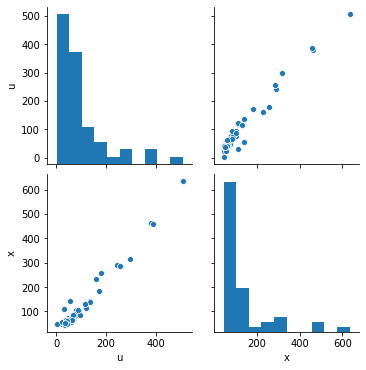

In [8]:
sns.pairplot(df) 
plt.show()

# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

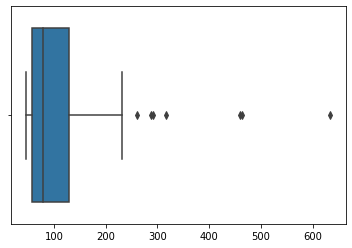

In [12]:
sns.boxplot(df[['x']])
plt.show()

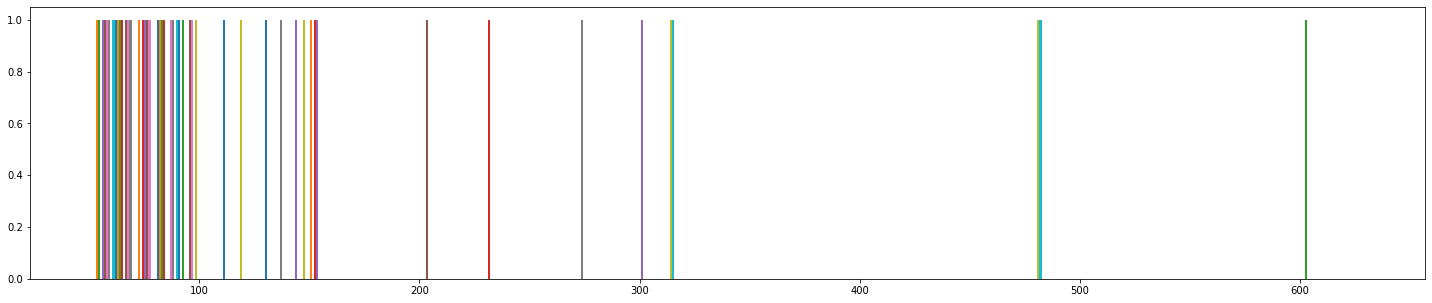

In [23]:
plt.figure(figsize=(25,5))
plt.hist(df[['x']])
plt.show()

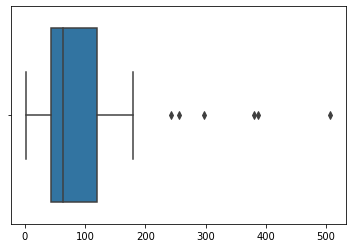

In [13]:
sns.boxplot(df[['u']])
plt.show()

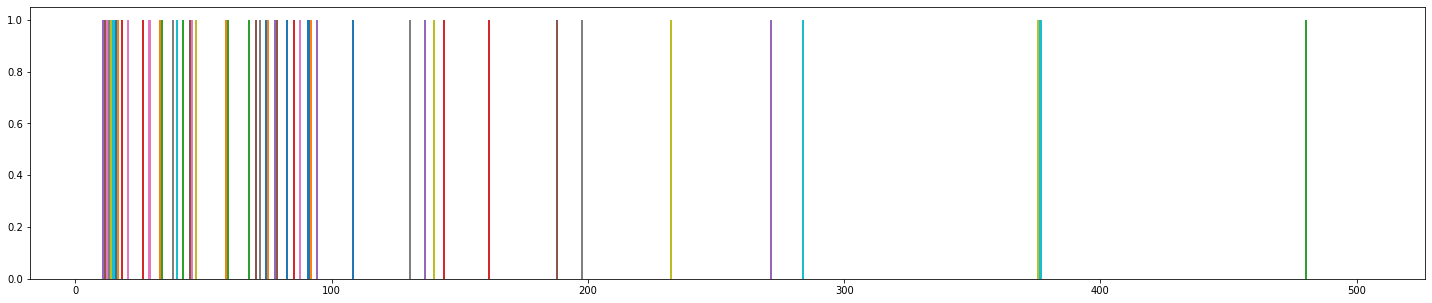

In [24]:
plt.figure(figsize=(25,5))
plt.hist(df[['u']])
plt.show()

In [28]:
df.mean()

u    103.142857
x    127.795918
dtype: float64

In [27]:
df.median()

u    64.0
x    79.0
dtype: float64

In [29]:
df.var()

u    10900.416667
x    15158.832483
dtype: float64

In [30]:
df.std()

u    104.405061
x    123.121211
dtype: float64

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

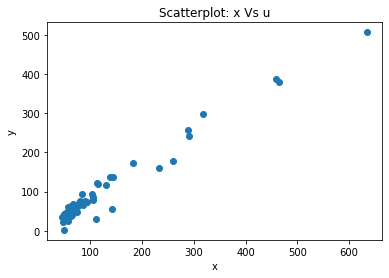

In [34]:
plt.scatter(df[['x']],df[['u']])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot: x Vs u')
plt.show()

In [36]:
pd.crosstab(df.x, df.u)

u,2,23,25,29,30,36,37,38,40,43,...,138,161,172,179,243,256,298,381,387,507
x,,,,,,,,,,,,,,,,,,,,,
46,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [48]:
df.head(2)

,u,x
0,138,143
1,93,104


In [47]:
df.shape

(49, 2)

In [49]:
df_scaled = df.apply(zscore)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
X = df_scaled[['u']]
Y = df_scaled[['x']]

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [52]:
#missing values in dataset

df.isnull().sum()

u    0
x    0
dtype: int64

In [53]:
#Correlation matrix
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation between u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)#80-20 split
print("X_train Records:",X_train.count())
print("y_train Records:",y_train.count())
print("X_test Records:",X_test.count())
print("y_test Records:",y_test.count())

X_train Records: u    39
dtype: int64
y_train Records: x    39
dtype: int64
X_test Records: u    10
dtype: int64
y_test Records: x    10
dtype: int64


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [56]:
# invoke the LinearRegression function
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))    

intercept = regression_model.intercept_[0]
print("The intercept is {}".format(intercept))

The coefficient for u is 0.9831983927040457
The intercept is 0.01240497188752547


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

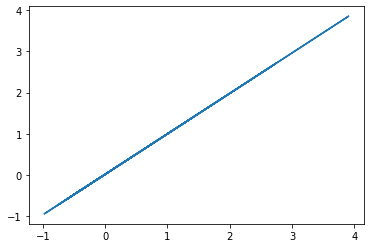

In [57]:
y = regression_model.coef_[0][0] * X_train + regression_model.intercept_[0]
plt.plot(X_train,y)

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Validate the model with Root Mean Squares error
y_Predict = regression_model.predict(X_test)

print("mean_squared_error:",mean_squared_error(y_test,y_Predict))
# Validate the model with R2

print("r2_score:",r2_score(y_test,y_Predict))

mean_squared_error: 0.03682752839849216
r2_score: 0.918192256039698


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [59]:
print("Training Score:",regression_model.score(X_train,y_train))
print("Testing Score:",regression_model.score(X_test, y_test))

Training Score: 0.9682175540860047
Testing Score: 0.9181922560396981
